In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from collections import Counter
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 5
pd.options.display.max_columns = 25
sns.set(style='darkgrid')

In [2]:
dataset = pd.read_csv('kc_house_data.csv')

## Basic dataset descriptions and cleaning

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The mean price is $540,088.1
The minimum price is $75,000.0
The maximum price is $7,700,000.0
The median price is $450,000.0
The standard deviation of prices is $367,127.2


In [5]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Checking for null values

In [6]:
pd.DataFrame(dataset.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There is no null Value.

### Checking for unique values

In [7]:
UniqueDF = dataset.columns
for i in UniqueDF:
    print("'", i, "has these many uniques: ",dataset[i].nunique())

' id has these many uniques:  21436
' date has these many uniques:  372
' price has these many uniques:  4028
' bedrooms has these many uniques:  13
' bathrooms has these many uniques:  30
' sqft_living has these many uniques:  1038
' sqft_lot has these many uniques:  9782
' floors has these many uniques:  6
' waterfront has these many uniques:  2
' view has these many uniques:  5
' condition has these many uniques:  5
' grade has these many uniques:  12
' sqft_above has these many uniques:  946
' sqft_basement has these many uniques:  306
' yr_built has these many uniques:  116
' yr_renovated has these many uniques:  70
' zipcode has these many uniques:  70
' lat has these many uniques:  5034
' long has these many uniques:  752
' sqft_living15 has these many uniques:  777
' sqft_lot15 has these many uniques:  8689


In [8]:
dataset.shape

(21613, 21)

In [9]:
dataset['age'] = 2020-dataset['yr_built']

In [10]:
dataset.drop('yr_built', axis=1,inplace=True)

In [11]:
dataset.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,65
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,69
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,87
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,55
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,33
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,0,98053,47.6561,-122.005,4760,101930,19
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,0,98003,47.3097,-122.327,2238,6819,25
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,0,98198,47.4095,-122.315,1650,9711,57
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,0,98146,47.5123,-122.337,1780,8113,60
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,0,98038,47.3684,-122.031,2390,7570,17


## Pre-standardization EDA

In [14]:
plt.rcParams['figure.figsize']=(18,14)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1266b8a60>,
      dtype=object)

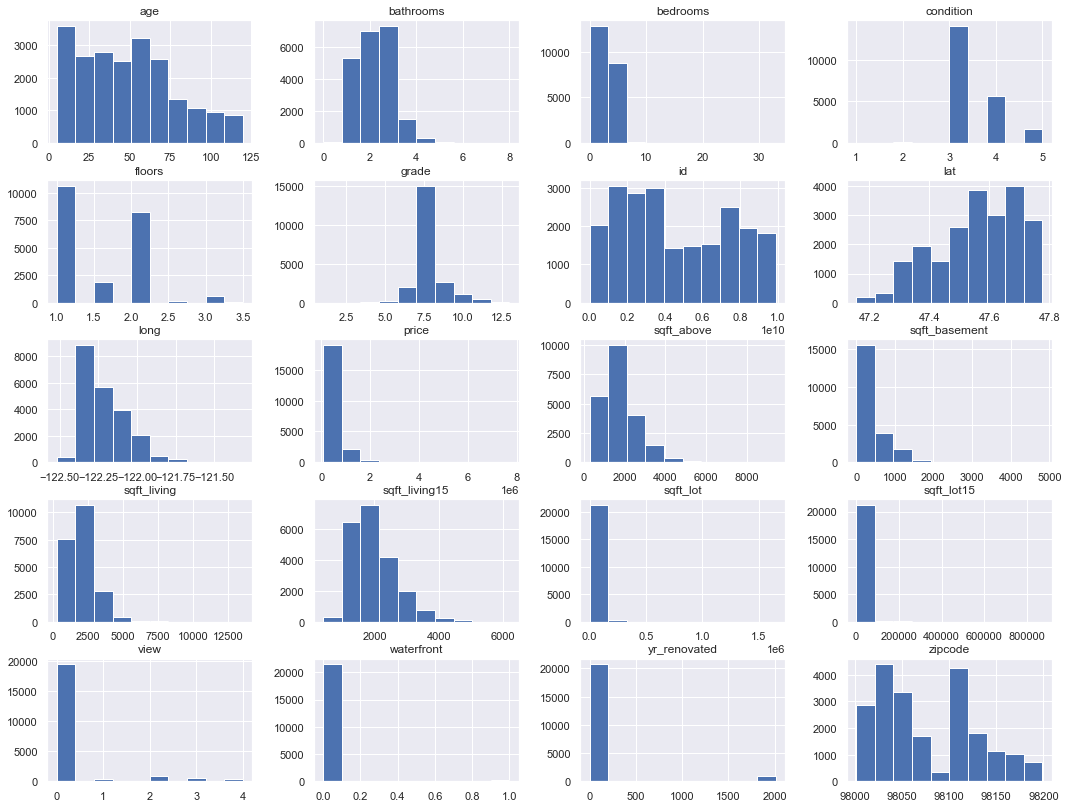

In [15]:
dataset.hist()  # Visualizing variables that affect the price

In [16]:
plt.rcParams['figure.figsize']=(7,5)

skewness : 4.024069144684712
kurtosis : 34.58554043194243


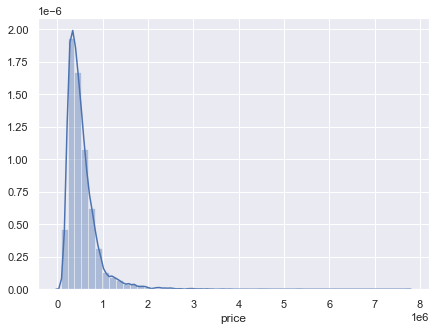

In [17]:
sns.distplot(dataset['price'])
print("skewness :", dataset['price'].skew())
print("kurtosis :", dataset['price'].kurt())

This means that the 'price' variable is positively skewed. We will therefore take the logarithmic value when training the dataset in order to normalize it.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

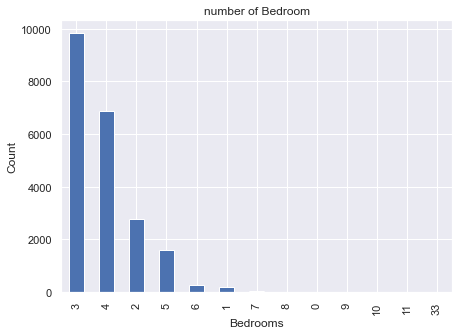

In [18]:
dataset['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

3 bedroom houses are most commonly sold followed by 4 bedroom. For a builder having this data, he can make a new building with more 3 and 4 bedrooms to attract more buyers.

<Figure size 576x576 with 0 Axes>

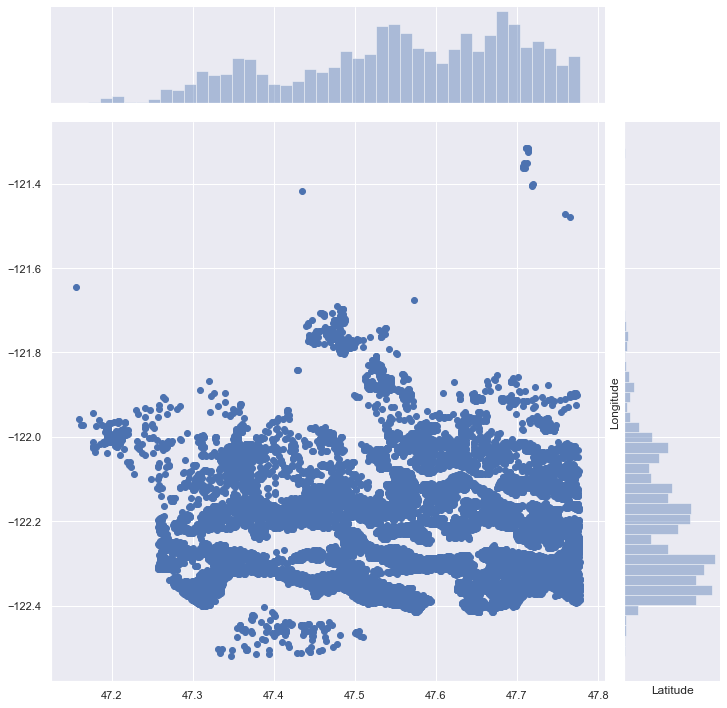

TypeError: 'module' object is not callable

In [20]:
# Visualizing location data so we can understand how location affects purchases.
plt.figure(figsize=(8,8))
sns.jointplot(x=dataset.lat.values, y=dataset.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

For latitude between -47.7 and -48.8 there are many houses, which would mean that maybe it’s an ideal location.  For longitude, we can see that concentration is high between -122.2 to -122.4. This could mean that most of the purchases have been for this particular location.

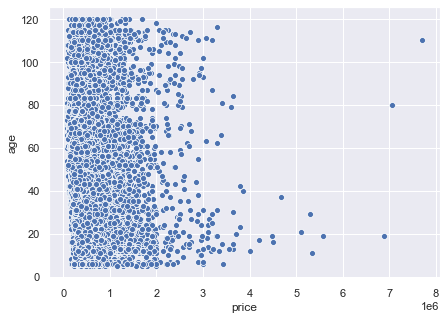

In [21]:
ax = sns.scatterplot(x="price", y="age", data=dataset)  # Checking for outliers

There are very few outliers.

Text(0.5, 1.0, 'Price vs Square Feet')

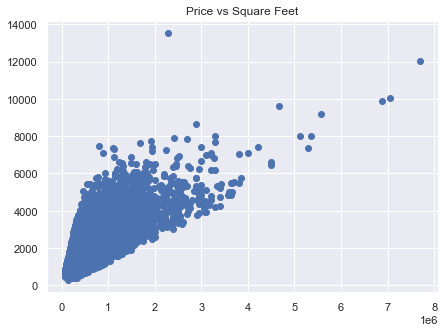

In [23]:
plt.scatter(dataset.price,dataset.sqft_living)
plt.title("Price vs Square Feet")  # Checking for factors that affect pricing 

Text(0.5, 1.0, 'Price vs Location of the area')

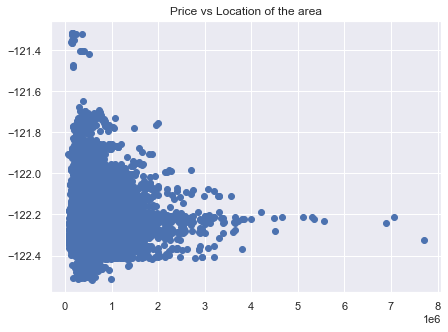

In [25]:
plt.scatter(dataset.price,dataset.long)
plt.title("Price vs Location of the area") # How location affects prices

From the first figure, we can see that the more the living area,the more the price though data is concentrated towards a particular price zone, but from the figure we can see that the data points seem to be in linear direction. Thanks to scatter plot, we can also see some irregularities that the house with the highest square feet was sold for very less, maybe there is another factor or probably the data must be wrong. The second figure tells us about the location of the houses in terms of longitude and it gives us quite an interesting observation that -122.2 to -122.4 sells houses at much higher amount.

Text(0.5, 1.0, 'Latitude vs Price')

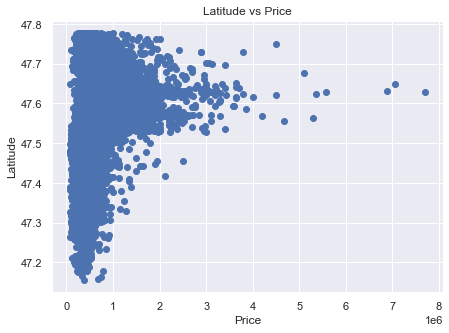

In [26]:
plt.scatter(dataset.price,dataset.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

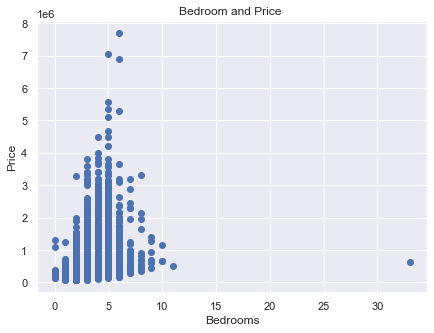

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [27]:
plt.scatter(dataset.bedrooms,dataset.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

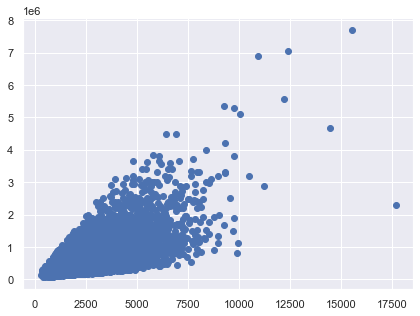

In [28]:
plt.scatter((dataset['sqft_living']+dataset['sqft_basement']),dataset['price'])

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

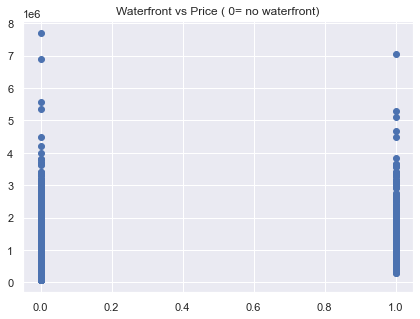

In [29]:
plt.scatter(dataset.waterfront,dataset.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

From these plots, we can see how different variables affect the prices of houses. Factors like square feet, waterfronts and internal dimensions of some parts of the house all contribute to the prices.


Now let's take a boxplot combining these values to see how they affect the prices.

In [34]:
df_boxplot = dataset[['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_living15', 'age']]
df_barplot = dataset[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade']] 

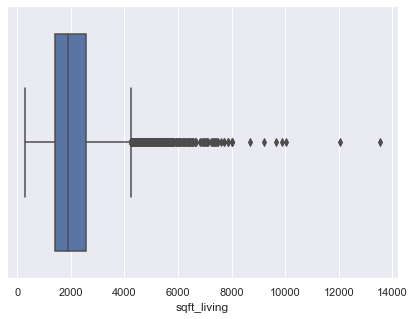

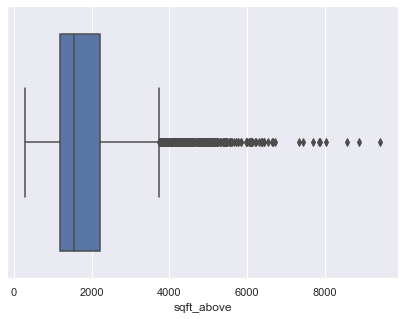

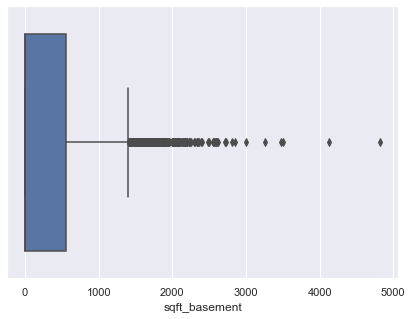

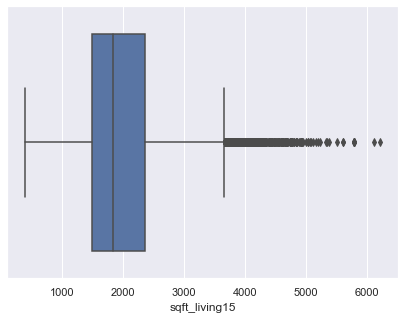

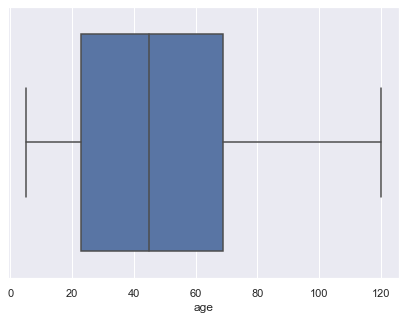

In [35]:
for i in df_boxplot.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(x=i, data=dataset)
    plt.show()

These plots show how specific variables affect the prices collectively and the distribution.

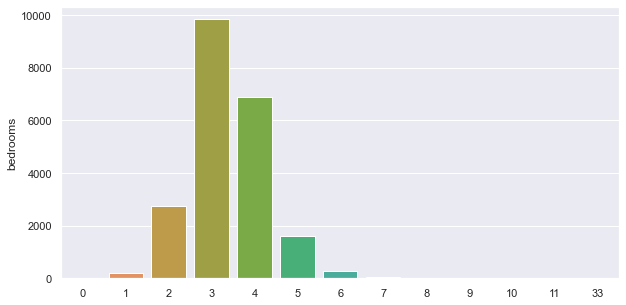

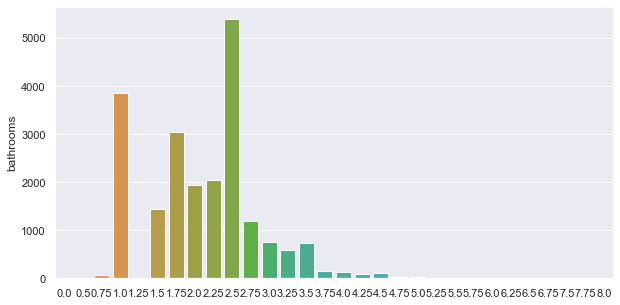

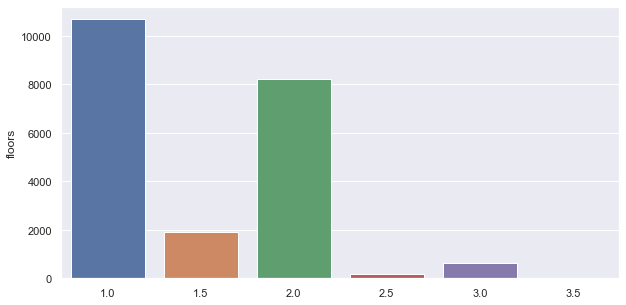

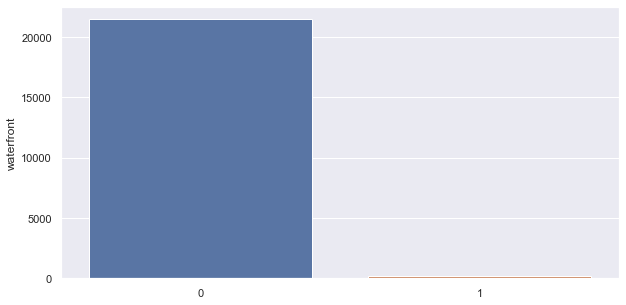

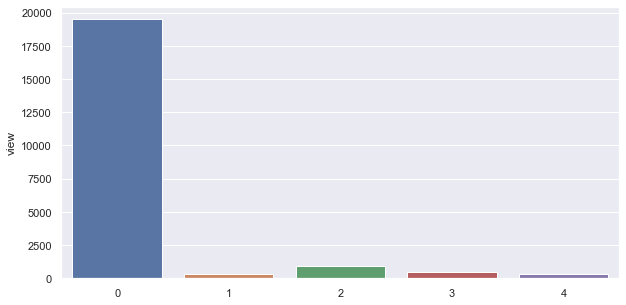

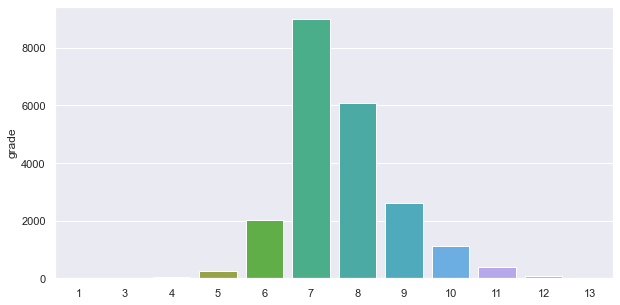

In [36]:
for i in df_barplot.columns:
    plt.figure(figsize=(10,5))
    cat_num = dataset[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

We can see how separate distributions of grades, floors , views etc are spread within the dataset.

## Correlation with respect to price

In [37]:
pd.DataFrame(dataset.corr()['price']).sort_values(by='price',ascending=False)  

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


Data is now correlated with respect to price

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

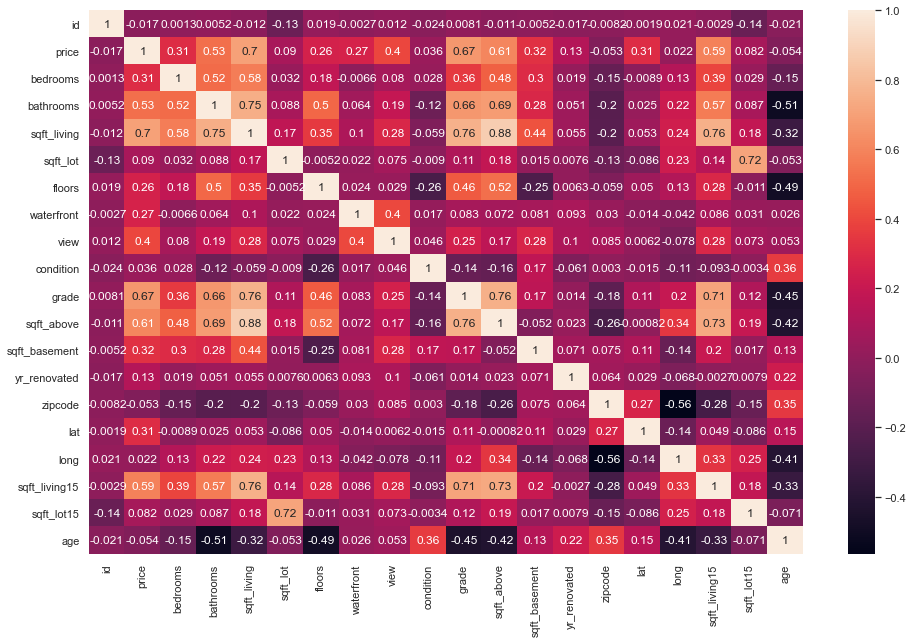

In [39]:
sns.set()
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),annot=True)  # Evaluating heatmap for correlated data

This shows that some variables like zipcodes and id have limited effect on the data and should be disregarded.

## Feature Engineering

In [40]:
dataset['sqft_with_basement']=dataset['sqft_above']+dataset['sqft_basement']
dataset['sqft']=dataset['sqft_living']+dataset['sqft_lot']
dataset['sqft15']=dataset['sqft_living15']+dataset['sqft_lot15']  # Merging similar columns together in order to reduce variance

In [41]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,sqft_with_basement,sqft,sqft15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,65,1180,6830,6990
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,69,2570,9812,9329
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,87,770,10770,10782
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,55,1960,6960,6360
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,33,1680,9760,9303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,0,98103,47.6993,-122.346,1530,1509,11,1530,2661,3039
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,0,98146,47.5107,-122.362,1830,7200,6,2310,8123,9030
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,0,98144,47.5944,-122.299,1020,2007,11,1020,2370,3027
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,0,98027,47.5345,-122.069,1410,1287,16,1600,3988,2697


# Training and Modelling

In [42]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [43]:
reg = LinearRegression() # Using linear regression

In [44]:
y = dataset['price']  # Target variable
conv_dates = [1 if values == 2014 else 0 for values in dataset.date ] # Some standardization for the dates mapping integer values to them
dataset['date'] = conv_dates
x = dataset.drop(['id', 'price',],axis=1) # Predictor variables



Now we have to normalize our model before training it.

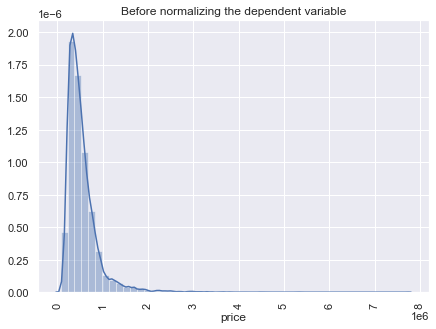

In [45]:
sns.distplot(y);
plt.xticks(rotation=90);
plt.title("Before normalizing the dependent variable");

This is also called as normal gaussian distribution


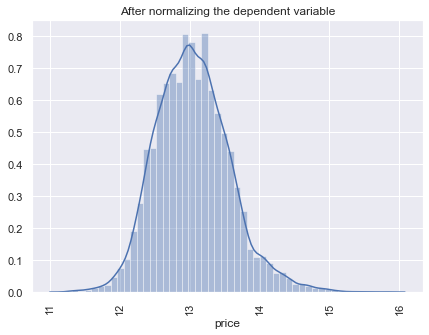

In [46]:
y = np.log(y)
# we just normalized the y variable using log which is available in numpy. We normalized because data was skewed to the left so predictions will have huge absolute errors.

sns.distplot(y);
plt.xticks(rotation=90);
plt.title("After normalizing the dependent variable");
print("This is also called as normal gaussian distribution")

Normalization by logarithm allows the model to fit properly across the distribution

## Train Test Split 

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.35,random_state=0) # We are going with a 65-35 split

In [48]:
reg.fit(x_train,y_train) # Fitting our model

LinearRegression()

### Model Evaluation

In [50]:
reg.score(x_test,y_test)

0.7745879795401046

Our linear model has a 77% accuracy.

Let's consider the coefficients.

In [51]:
from sklearn.linear_model import LinearRegression
coeff_df = pd.DataFrame(reg.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
date,0.000000
bedrooms,-0.006535
bathrooms,0.071017
sqft_living,0.000045
sqft_lot,-0.000022
floors,0.076760
waterfront,0.401817
view,0.058224
condition,0.062730
grade,0.155766


### Interpreting Coefficients

Interpreting the coefficients:
    The inverse function of each value will give the comparative.
    
Holding all other features fixed, a 1 unit increase in bathrooms is associated with an increase of In(0.071017)e+04 in price.

Holding all other features fixed, a 1 unit increase in floors is associated with an increase of In(0.076760)e+04  in price.

Holding all other features fixed, a 1 unit increase in age is associated with an increase of In(0.003405)e+06   in price.

Holding all other features fixed, a 1 unit increase in waterfronts is associated with an increase of In(0.401817)e+06 in price.

Holding all other features fixed, a 1 unit increase in grade is associated with an In(0.155766)e+06 in price.

## Gradient Boosting Regressors

In [53]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls') 

In [54]:
clf.fit(x_train, y_train) # fitting our model

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [55]:
clf.score(x_test,y_test)

0.9041871579779094

Our Gradient Boosting Regression has 90% accuracy.


Time to make our prediction.


In [56]:
y_pred = reg.predict(x_test) # Making predictions with our Gradient Boosting Algorithms

In [57]:
y_pred

array([12.94934154, 14.51703874, 12.98780189, ..., 13.19988263,
       13.7412565 , 12.43862376])

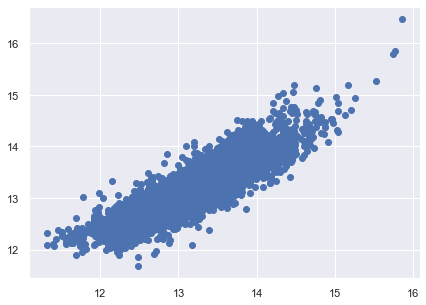

In [59]:
plt.scatter(y_test,y_pred)

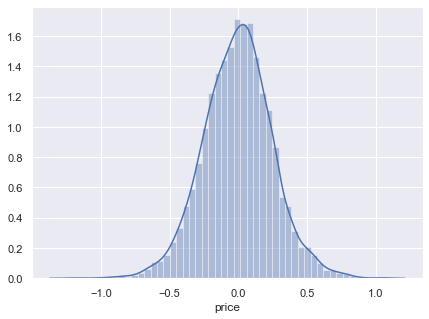

In [60]:
sns.distplot((y_test-y_pred),bins=50);

This shows our predictions are accurate. The variance is distributed evenly around zero. Let's use Random Forest for more accuracy.

## Random Forest Regressor

In [61]:
regressor = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=100,min_samples_leaf=4,min_samples_split=10,random_state=0)
model=regressor.fit(x_train, y_train)
print("Train_Accuracy")
print(regressor.score(x_train,y_train))
print("Test_Accuracy")
print(regressor.score(x_test,y_test))

Train_Accuracy
0.9513197296496583
Test_Accuracy
0.8896533928533603


Our algorithms have a 95% train accuracy and an 88% test accuracy. Good enough. We will evaluate the errors now.

### Error evaluation and loss functions

In [62]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.19576409624468427
Mean Squared Error: 0.06321242031979872
Root Mean Squared Error: 0.25142080327570093


This means our model is very accurate!. The errors are all < 1 which is indicative of high predictive ability. Now let's predict the sales price for 10% profit.

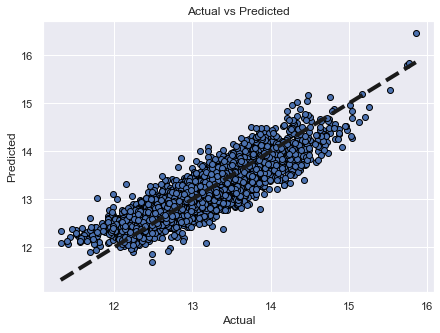

In [233]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

Our actual and predicted values are almost collinear. Strong accuracy.

## Testing the Model with client data 

To evaluate the accuracy of our model in predicting pricing for 10% profit, we will test it with client data

In [223]:
# Producing values for client data representing all the columns
clientdata = {}
Data = dataset.drop(['id','price'],axis=1)

keys = Data.columns
values = [0,10,6,2000,10000,3,1,3,4,10,2000,4000,2015,98088,47.6900,-122.300000,7000,8000,30,6000,10000,15000]

for key in keys: 
    for value in values: 
        clientdata[key] = value 
        values.remove(value) 
        break  



In [224]:
clientdata

{'date': 0,
 'bedrooms': 10,
 'bathrooms': 6,
 'sqft_living': 2000,
 'sqft_lot': 10000,
 'floors': 3,
 'waterfront': 1,
 'view': 3,
 'condition': 4,
 'grade': 10,
 'sqft_above': 2000,
 'sqft_basement': 4000,
 'yr_renovated': 2015,
 'zipcode': 98088,
 'lat': 47.69,
 'long': -122.3,
 'sqft_living15': 7000,
 'sqft_lot15': 8000,
 'age': 30,
 'sqft_with_basement': 6000,
 'sqft': 10000,
 'sqft15': 15000}

In [225]:
# Creating a matrix for client's data
clientdata


{'date': 0,
 'bedrooms': 10,
 'bathrooms': 6,
 'sqft_living': 2000,
 'sqft_lot': 10000,
 'floors': 3,
 'waterfront': 1,
 'view': 3,
 'condition': 4,
 'grade': 10,
 'sqft_above': 2000,
 'sqft_basement': 4000,
 'yr_renovated': 2015,
 'zipcode': 98088,
 'lat': 47.69,
 'long': -122.3,
 'sqft_living15': 7000,
 'sqft_lot15': 8000,
 'age': 30,
 'sqft_with_basement': 6000,
 'sqft': 10000,
 'sqft15': 15000}

In [226]:
glean = list(clientdata.values())

In [227]:
glean

[0,
 10,
 6,
 2000,
 10000,
 3,
 1,
 3,
 4,
 10,
 2000,
 4000,
 2015,
 98088,
 47.69,
 -122.3,
 7000,
 8000,
 30,
 6000,
 10000,
 15000]

In [228]:
mid_data = np.array(glean)

In [229]:
mid_data

array([ 0.0000e+00,  1.0000e+01,  6.0000e+00,  2.0000e+03,  1.0000e+04,
        3.0000e+00,  1.0000e+00,  3.0000e+00,  4.0000e+00,  1.0000e+01,
        2.0000e+03,  4.0000e+03,  2.0150e+03,  9.8088e+04,  4.7690e+01,
       -1.2230e+02,  7.0000e+03,  8.0000e+03,  3.0000e+01,  6.0000e+03,
        1.0000e+04,  1.5000e+04])

In [230]:
client_data = np.matrix(mid_data)

In [231]:
client_data

matrix([[ 0.0000e+00,  1.0000e+01,  6.0000e+00,  2.0000e+03,  1.0000e+04,
          3.0000e+00,  1.0000e+00,  3.0000e+00,  4.0000e+00,  1.0000e+01,
          2.0000e+03,  4.0000e+03,  2.0150e+03,  9.8088e+04,  4.7690e+01,
         -1.2230e+02,  7.0000e+03,  8.0000e+03,  3.0000e+01,  6.0000e+03,
          1.0000e+04,  1.5000e+04]])

In [232]:
results = regressor.predict(client_data)
conversion = [(np.exp(x)) for x in [i for i in results]]
print("The predicted price for the client's house is ${}".format(int(conversion[0])))

The predicted price for the client's house is $1427774


From our EDA, the mean price is $540,088.1
Our predicted price is $1.4m which is closer to the mean price than the median price. This means more than 10% profit considering that the pricing distribution for houses with square feet less than 10,000 clustered at less than $1.5m while houses with 10 bedrooms sold at less than $1.5m.